In [38]:
import pandas as pd
import plotly.express as px
from datetime import datetime 

In [2]:
tree_df = pd.read_csv("tree.csv")
tree_df.head()

X          Y  OBJECTID    streetaddress    city  zipcode  \
0 -78.870383  35.989677    458609  2403 QUINCY ST   DURHAM  27703.0   
1 -78.902555  35.993735    458610  123 VIVIAN ST 1  DURHAM  27701.0   
2 -78.902493  35.993718    458611  123 VIVIAN ST 2  DURHAM  27701.0   
3 -78.940388  35.991581    458612              NaN     NaN      NaN   
4 -78.934895  35.996713    458613              NaN     NaN      NaN   

   facilityid present        genus     species  ... carbonavoid_lbperyr  \
0     2886907    Tree       Cercis  canadensis  ...               0.322   
1     2886981    Tree  Chionanthus     retusus  ...              -2.970   
2     2886982    Tree  Chionanthus     retusus  ...              -6.156   
3     2891630    Tree      Quercus        alba  ...                 NaN   
4     2891631    Tree      Quercus  virginiana  ...                 NaN   

  carbonavoid_dolperyr  heating_mbtuperyr heating_dolperyrmbtu  \
0                 0.03             -0.021                -0.28   
1                -0.25             -0.080                -1.11   
2                -0.52             -0.138                -1.90   
3                  NaN                NaN                  NaN   
4                  NaN                NaN                  NaN   

  heating_kwhperyr  heating_dolperyrmwh cooling_kwhperyr cooling_dolperyr  \
0           -0.472                -0.06            4.624             0.55   
1           -1.865                -0.22            5.732             0.69   
2           -3.192                -0.38            6.762             0.81   
3              NaN                  NaN              NaN              NaN   
4              NaN                  NaN              NaN              NaN   

  totalenerg_dolperyr contractplantingyr  
0                0.21                NaN  
1               -0.64                NaN  
2               -1.48                NaN  
3                 NaN                NaN  
4                 NaN                NaN  

[5 rows x 69 columns]

In [3]:
tree_col = tree_df.columns.tolist()

In [4]:
tree_col

# for translation of some of the col: https://live-durhamnc.opendata.arcgis.com/datasets/DurhamNC::trees-planting-sites/about
# x and y are latitude and longitude respectively
# Looks like all rows have NaN
# all lat and lon are present
# Note that all future planting sites are also in the dataset. It would follow that these sites would have lat and lon, but then have other NaN



['X',
 'Y',
 'OBJECTID',
 'streetaddress',
 'city',
 'zipcode',
 'facilityid',
 'present',
 'genus',
 'species',
 'commonname',
 'plantingdate',
 'diameterin',
 'heightft',
 'condition',
 'contractwork',
 'neighborhood',
 'program',
 'plantingw',
 'plantingcond',
 'underpwerlins',
 'matureheight',
 'GlobalID',
 'created_user',
 'created_date',
 'last_edited_user',
 'last_edited_date',
 'isoprene',
 'monoterpene',
 'vocs',
 'coremoved_ozperyr',
 'coremoved_dolperyr',
 'o3removed_ozperyr',
 'o3removed_dolperyr',
 'no2removed_ozperyr',
 'no2removed_dolperyr',
 'so2removed_ozperyr',
 'so2removed_dolperyr',
 'pm10removed_ozperyr',
 'pm10removed_dolperyr',
 'pm25removed_ozperyr',
 'o2production_lbperyr',
 'replacevalue_dol',
 'carbonstorage_lb',
 'carbonstorage_dol',
 'grosscarseq_lbperyr',
 'grosscarseq_dolperyr',
 'avoidrunoff_ft2peryr',
 'avoidrunoff_dol2peryr',
 'polremoved_ozperyr',
 'polremoved_dolperyr',
 'totannbenefits_dolperyr',
 'leafarea_sqft',
 'potevapotran_cuftperyr',
 'evapor

In [5]:
nan_tree = tree_df.isna().any(axis=1)
nan_tree

0        True
1        True
2        True
3        True
4        True
         ... 
27688    True
27689    True
27690    True
27691    True
27692    True
Length: 27693, dtype: bool

In [6]:
tree_df.shape

(27693, 69)

In [7]:
tree_loc = tree_df[["X","Y", "commonname", "genus", "species", "coremoved_ozperyr", "carbonstorage_lb", "present"]]
tree_loc

X          Y           commonname        genus     species  \
0     -78.870383  35.989677       Eastern Redbud       Cercis  canadensis   
1     -78.902555  35.993735  Chinese Fringe Tree  Chionanthus     retusus   
2     -78.902493  35.993718  Chinese Fringe Tree  Chionanthus     retusus   
3     -78.940388  35.991581            White Oak      Quercus        alba   
4     -78.934895  35.996713             Live Oak      Quercus  virginiana   
...          ...        ...                  ...          ...         ...   
27688 -78.918469  36.051412                  NaN          NaN         NaN   
27689 -78.918583  36.051414                  NaN          NaN         NaN   
27690 -78.918740  36.051420                  NaN          NaN         NaN   
27691 -78.916430  36.023540                  NaN          NaN         NaN   
27692 -78.907408  35.971533                  NaN          NaN         NaN   

       coremoved_ozperyr  carbonstorage_lb        present  
0                    0.0               2.2           Tree  
1                    0.0              78.7           Tree  
2                    0.0              78.7           Tree  
3                    0.8            2645.6           Tree  
4                    0.3             493.9           Tree  
...                  ...               ...            ...  
27688                NaN               NaN  Planting Site  
27689                NaN               NaN  Planting Site  
27690                NaN               NaN  Planting Site  
27691                NaN               NaN  Planting Site  
27692                NaN               NaN            NaN  

[27693 rows x 8 columns]

In [8]:
# Interesting way to find number of rows with NaN
# Source: https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe
tree_loc.shape[0] - tree_loc.dropna().shape[0]

13521

In [9]:
tree_loc_drop = tree_loc.dropna()

In [10]:
tree_loc_drop.shape

(14172, 8)

In [11]:
plant_site = tree_loc[tree_loc['present']== 'Planting Site']

# print(type(test))


In [12]:
nan_trees=tree_df.loc[tree_df.isnull().any(axis=1)]

In [13]:
nan_trees.to_csv("/Users/johncompton/Desktop/tree-project/nan_trees.csv")

In [27]:
def tree_clean(exist,data):
    df = data.loc[data['present']==exist,["X","Y","genus", "species", "commonname", "coremoved_ozperyr", "carbonstorage_lb", 'diameterin','plantingdate']].fillna("not available")
    return df





In [28]:
future_tree = tree_clean('Planting Site', tree_df)
future_tree

X          Y          genus        species     commonname  \
90    -78.904191  36.023430  not available  not available  not available   
95    -78.891945  36.019782  not available  not available  not available   
122   -78.904022  36.022702  not available  not available  not available   
127   -78.902804  36.022639  not available  not available  not available   
134   -78.897429  36.023728  not available  not available  not available   
...          ...        ...            ...            ...            ...   
27687 -78.918370  36.051421  not available  not available  not available   
27688 -78.918469  36.051412  not available  not available  not available   
27689 -78.918583  36.051414  not available  not available  not available   
27690 -78.918740  36.051420  not available  not available  not available   
27691 -78.916430  36.023540  not available  not available  not available   

      coremoved_ozperyr carbonstorage_lb     diameterin   plantingdate  
90                  0.5           1454.7  not available  not available  
95                  0.0              1.4  not available  not available  
122       not available    not available            0.0  not available  
127       not available    not available            0.0  not available  
134       not available    not available            0.0  not available  
...                 ...              ...            ...            ...  
27687     not available    not available  not available  not available  
27688     not available    not available  not available  not available  
27689     not available    not available  not available  not available  
27690     not available    not available  not available  not available  
27691     not available    not available  not available  not available  

[6536 rows x 9 columns]

In [29]:
# May want to update this to have a planting date

current_tree = tree_clean('Tree', tree_df)
current_tree

X          Y          genus        species  \
0     -78.870383  35.989677         Cercis     canadensis   
1     -78.902555  35.993735    Chionanthus        retusus   
2     -78.902493  35.993718    Chionanthus        retusus   
3     -78.940388  35.991581        Quercus           alba   
4     -78.934895  35.996713        Quercus     virginiana   
...          ...        ...            ...            ...   
24922 -78.897290  36.040880  not available  not available   
25172 -78.900086  36.003215        Zelkova        serrata   
25173 -78.900078  36.003037        Zelkova        serrata   
25174 -78.900080  36.003106        Zelkova        serrata   
27313 -78.917714  36.024018  not available  not available   

                commonname coremoved_ozperyr carbonstorage_lb     diameterin  \
0           Eastern Redbud               0.0              2.2            1.0   
1      Chinese Fringe Tree               0.0             78.7            4.0   
2      Chinese Fringe Tree               0.0             78.7            4.0   
3                White Oak               0.8           2645.6           22.0   
4                 Live Oak               0.3            493.9           12.0   
...                    ...               ...              ...            ...   
24922        not available     not available    not available  not available   
25172     Japanese Zelkova     not available    not available            2.0   
25173     Japanese Zelkova     not available    not available            2.0   
25174     Japanese Zelkova     not available    not available            2.0   
27313        not available               0.6           2234.7  not available   

        plantingdate  
0          2018-2019  
1          2018-2019  
2          2018-2019  
3      not available  
4      not available  
...              ...  
24922  not available  
25172  not available  
25173  not available  
25174  not available  
27313  not available  

[21122 rows x 9 columns]

In [30]:
plant_site = tree_df[tree_df['present']=='Planting Site']
plant_site.shape


(6536, 69)

In [31]:
# Consider locating the unique common names and finding info for basic care info for common names
# Want to figure out how to find closest tree based on lat/lon and address input - could also use dcc.Geolocation and do a map pointing where the user is
# Idea of improving data with people adding in missing data?


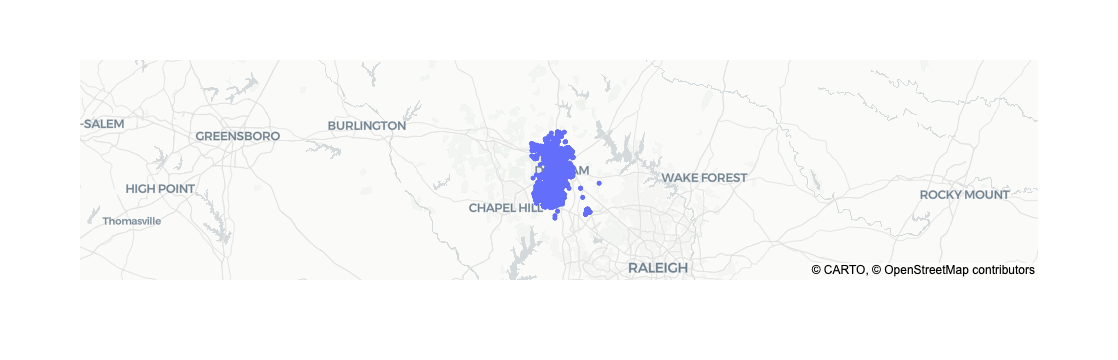

In [37]:
# fig = px.scatter_map(df, lat="centroid_lat", lon="centroid_lon",     color="peak_hour", size="car_hours",
#                   color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

planted_map = px.scatter_map(current_tree, lat="Y", lon="X", map_style='carto-positron',
                             hover_data=['genus','species', 'commonname', 'diameterin', 'plantingdate'])

planted_map.show()

## Ideas for Dash App

### Interactions
* User could select between planted trees and plant sites
* This would select the appropriate dataframe, clean data, and create visual
* Like the idea of clicking on a point and it bringing up a card with info about that tree
* Curious about photo? May require mongodb?

### Data flow
* Want to have a scheduled task that checks durham open data for new data and if it is newwer than today, downloads it.
* Place it in Persistent filesystem, convert to Postgres db tables - 2 tables planted and plant site.